# Evaluation of WaveLevel Calls results for Strategy Optimization

In [1]:
from Backtester.streamer.simple import SimpleStreamer
import Backtester.indicators.trade_caller as tc


simp = SimpleStreamer("bybit", "BTC/USDT:USDT")

In [2]:
import time

st = time.time()
a1 = tc.range_test(simp, "2022-08-01", "2022-11-15", a=1)
et = time.time()

print(et-st, "seconds")

finished 2022-08-01 00:00:00
finished 2022-08-03 00:00:00
finished 2022-08-05 00:00:00
finished 2022-08-07 00:00:00
finished 2022-08-09 00:00:00
finished 2022-08-11 00:00:00
finished 2022-08-13 00:00:00
finished 2022-08-15 00:00:00
finished 2022-08-17 00:00:00
finished 2022-08-19 00:00:00
finished 2022-08-21 00:00:00
finished 2022-08-23 00:00:00
finished 2022-08-25 00:00:00
finished 2022-08-27 00:00:00
finished 2022-08-29 00:00:00
finished 2022-08-31 00:00:00
finished 2022-09-02 00:00:00
finished 2022-09-04 00:00:00
finished 2022-09-06 00:00:00
finished 2022-09-08 00:00:00
finished 2022-09-10 00:00:00
finished 2022-09-12 00:00:00
finished 2022-09-14 00:00:00
finished 2022-09-16 00:00:00
finished 2022-09-18 00:00:00
finished 2022-09-20 00:00:00
finished 2022-09-22 00:00:00
finished 2022-09-24 00:00:00
finished 2022-09-26 00:00:00
finished 2022-09-28 00:00:00
finished 2022-09-30 00:00:00
finished 2022-10-02 00:00:00
finished 2022-10-04 00:00:00
finished 2022-10-06 00:00:00
finished 2022-

In [2]:
# Result

def evaluate(result):
    txs = {"1m": 10, "15m": 20, "1h": 40, "4h":80}

    def get_size(key: tuple, txmap: dict):
        return txmap[key[2]] * abs(key[3])

    profit, loss = 0.0, 0.0
    for k, v in result.items():
        # if (k[1] == "sell" and k[3] < 0) or (k[1] == "buy" and k[3] > 0):
        #     continue
        if v["status"] == "closed":
            profit += v["pnl"] * get_size(k, txs)
        if v["status"] =="open":
            loss += v["pnl"] * get_size(k, txs)
    print(f"Profit: {profit}, Loss:{loss}")
    return profit, loss

In [9]:
evaluate(a2)

Profit: 1399.4550000000015, Loss:-1705.5160000000012


(1399.4550000000015, -1705.5160000000012)

In [10]:
a1 = tc.range_test(simp, "2022-08-01", "2022-11-15", a=1)

finished 2022-08-01 00:00:00
finished 2022-08-03 00:00:00
finished 2022-08-05 00:00:00
finished 2022-08-07 00:00:00
finished 2022-08-09 00:00:00
finished 2022-08-11 00:00:00
finished 2022-08-13 00:00:00
finished 2022-08-15 00:00:00
finished 2022-08-17 00:00:00
finished 2022-08-19 00:00:00
finished 2022-08-21 00:00:00
finished 2022-08-23 00:00:00
finished 2022-08-25 00:00:00
finished 2022-08-27 00:00:00
finished 2022-08-29 00:00:00
finished 2022-08-31 00:00:00
finished 2022-09-02 00:00:00
finished 2022-09-04 00:00:00
finished 2022-09-06 00:00:00
finished 2022-09-08 00:00:00
finished 2022-09-10 00:00:00
finished 2022-09-12 00:00:00
finished 2022-09-14 00:00:00
finished 2022-09-16 00:00:00
finished 2022-09-18 00:00:00
finished 2022-09-20 00:00:00
finished 2022-09-22 00:00:00
finished 2022-09-24 00:00:00
finished 2022-09-26 00:00:00
finished 2022-09-28 00:00:00
finished 2022-09-30 00:00:00
finished 2022-10-02 00:00:00
finished 2022-10-04 00:00:00
finished 2022-10-06 00:00:00
finished 2022-

In [13]:
evaluate(a1)

Profit: 922.2289999999986, Loss:-587.6239999999998


(922.2289999999986, -587.6239999999998)

In [3]:
_open = {k: v for k, v in a1.items() if v["status"] == "open"}
_closed = {k: v for k, v in a1.items() if v["status"] == "closed"}

In [4]:
_open

{('2022-08-11 00:00:00', 'buy', '15m', -4): {'status': 'open',
  'open_close': (1660891020000, 1670803200000),
  'entry_exit': (22521.0, 23023.0),
  'drawdown': (1669067520000, 15440.0),
  'pnl': -0.2417,
  'duration': 165203.0},
 ('2022-08-11 00:00:00', 'buy', '15m', -3): {'status': 'open',
  'open_close': (1660867860000, 1670803200000),
  'entry_exit': (23023.0, 23200.0),
  'drawdown': (1669067520000, 15440.0),
  'pnl': -0.2582,
  'duration': 165589.0},
 ('2022-08-11 00:00:00', 'buy', '1m', -4): {'status': 'open',
  'open_close': (1660743660000, 1670803200000),
  'entry_exit': (23463.5, 23620.0),
  'drawdown': (1669067520000, 15440.0),
  'pnl': -0.2721,
  'duration': 167659.0},
 ('2022-08-13 00:00:00', 'buy', '15m', -4): {'status': 'open',
  'open_close': (1660891020000, 1670803200000),
  'entry_exit': (22521.0, 23145.5),
  'drawdown': (1669067520000, 15440.0),
  'pnl': -0.2417,
  'duration': 165203.0},
 ('2022-08-13 00:00:00', 'buy', '15m', -3): {'status': 'open',
  'open_close': (1

In [7]:
def calc_dd(k, v):
    if k[1] == "buy":
        v["dd"] = (v["drawdown"][1] - v["entry_exit"][1]) / v["entry_exit"][1]
    else:
        v["dd"] = (v["entry_exit"][1] - v["drawdown"][1]) / v["entry_exit"][1]
    return v

closed_dd = {k: calc_dd(k, v) for k, v in _closed.items()}
open_dd = {k: calc_dd(k, v) for k, v in _open.items()}

In [11]:
def edit_key(_d, key="ddtms_dd", _key="ddtms_ddv"):
    d = _d.copy()
    v = d.pop(key)
    d[_key] = v
    return d


all = {k: edit_key(v) for k, v in a1.items()}
all

{('2022-08-01 00:00:00', 'buy', '1h', -4): {'status': 'closed',
  'open_close': (1662486480000, 1662696000000),
  'entry_exit': (18867.5, 20141.0),
  'pnl': 0.0675,
  'duration': 3492.0,
  'dd': -0.08390844545951046,
  'ddtms_ddv': (1662517440000, 18451.0)},
 ('2022-08-01 00:00:00', 'buy', '1h', -3): {'status': 'closed',
  'open_close': (1661555880000, 1662696000000),
  'entry_exit': (20141.0, 20800.5),
  'pnl': 0.0327,
  'duration': 19002.0,
  'dd': -0.11295401552847287,
  'ddtms_ddv': (1662517440000, 18451.0)},
 ('2022-08-01 00:00:00', 'buy', '15m', -4): {'status': 'closed',
  'open_close': (1660953180000, 1660968000000),
  'entry_exit': (20800.5, 21347.5),
  'pnl': 0.0263,
  'duration': 247.0,
  'dd': -0.027778428387398992,
  'ddtms_ddv': (1660953300000, 20754.5)},
 ('2022-08-01 00:00:00', 'buy', '15m', -3): {'status': 'closed',
  'open_close': (1660891080000, 1662940800000),
  'entry_exit': (21347.5, 22368.5),
  'pnl': 0.0478,
  'duration': 34162.0,
  'dd': -0.1751346759952612,
  '

In [14]:
def split_tuple_records(rec: dict) -> dict:
    _rec = rec.copy()
    for k, v in rec.items():
        if isinstance(v, tuple):
            _rec.pop(k)
            if "_" in k:
                [k1, k2, *_] = k.split("_")
            else:
                k1 = k + "_1"
                k2 = k + "_2"
            _rec[k1] = v[0]
            _rec[k2] = v[1]
    return _rec



all_copy = all.copy()

all = {k: split_tuple_records(v) for k, v in all.items()}
all

{('2022-08-01 00:00:00', 'buy', '1h', -4): {'status': 'closed',
  'pnl': 0.0675,
  'duration': 3492.0,
  'dd': -0.08390844545951046,
  'open': 1662486480000,
  'close': 1662696000000,
  'entry': 18867.5,
  'exit': 20141.0,
  'ddtms': 1662517440000,
  'ddv': 18451.0},
 ('2022-08-01 00:00:00', 'buy', '1h', -3): {'status': 'closed',
  'pnl': 0.0327,
  'duration': 19002.0,
  'dd': -0.11295401552847287,
  'open': 1661555880000,
  'close': 1662696000000,
  'entry': 20141.0,
  'exit': 20800.5,
  'ddtms': 1662517440000,
  'ddv': 18451.0},
 ('2022-08-01 00:00:00', 'buy', '15m', -4): {'status': 'closed',
  'pnl': 0.0263,
  'duration': 247.0,
  'dd': -0.027778428387398992,
  'open': 1660953180000,
  'close': 1660968000000,
  'entry': 20800.5,
  'exit': 21347.5,
  'ddtms': 1660953300000,
  'ddv': 20754.5},
 ('2022-08-01 00:00:00', 'buy', '15m', -3): {'status': 'closed',
  'pnl': 0.0478,
  'duration': 34162.0,
  'dd': -0.1751346759952612,
  'open': 1660891080000,
  'close': 1662940800000,
  'entry'

In [27]:
def reduce_key(key, value) -> dict:
    _value = value.copy()
    _value["created_at"] = key[0]
    _value["side"] = key[1]
    _value["tx"] = key[2]
    _value["txi"] = key[3]
    return _value

def new_key(key, value) -> tuple:
    return (value["open"], key[0])

_all = [reduce_key(k, v) for i, (k, v) in enumerate(all.items())]
_all





[{'status': 'closed',
  'pnl': 0.0675,
  'duration': 3492.0,
  'dd': -0.08390844545951046,
  'open': 1662486480000,
  'close': 1662696000000,
  'entry': 18867.5,
  'exit': 20141.0,
  'ddtms': 1662517440000,
  'ddv': 18451.0,
  'created_at': '2022-08-01 00:00:00',
  'side': 'buy',
  'tx': '1h',
  'txi': -4},
 {'status': 'closed',
  'pnl': 0.0327,
  'duration': 19002.0,
  'dd': -0.11295401552847287,
  'open': 1661555880000,
  'close': 1662696000000,
  'entry': 20141.0,
  'exit': 20800.5,
  'ddtms': 1662517440000,
  'ddv': 18451.0,
  'created_at': '2022-08-01 00:00:00',
  'side': 'buy',
  'tx': '1h',
  'txi': -3},
 {'status': 'closed',
  'pnl': 0.0263,
  'duration': 247.0,
  'dd': -0.027778428387398992,
  'open': 1660953180000,
  'close': 1660968000000,
  'entry': 20800.5,
  'exit': 21347.5,
  'ddtms': 1660953300000,
  'ddv': 20754.5,
  'created_at': '2022-08-01 00:00:00',
  'side': 'buy',
  'tx': '15m',
  'txi': -4},
 {'status': 'closed',
  'pnl': 0.0478,
  'duration': 34162.0,
  'dd': -

In [1]:
import pandas as pd

df = pd.read_csv("btc_trades_wave_levels.csv", index_col=0)
df = df.sort_values("open")
df

,status,pnl,duration,dd,open,close,entry,exit,ddtms,ddv,created_at,side,tx,txi,opened_at
6,closed,0.0060,210.0,-0.009882,1.659314e+12,1659326400000,23365.0,23224.0,1.659319e+12,23453.5,2022-08-01 00:00:00,sell,1m,-3,2022-08-01 00:30:00
5,closed,0.0061,94.0,-0.010999,1.659335e+12,1659340800000,23224.0,23365.0,1.659338e+12,23108.0,2022-08-01 00:00:00,buy,1m,-4,2022-08-01 06:26:00
17,closed,0.0061,216.0,-0.012733,1.659486e+12,1659499200000,22833.0,22972.0,1.659489e+12,22679.5,2022-08-03 00:00:00,buy,1m,-4,2022-08-03 00:24:00
18,closed,0.0059,716.0,-0.029732,1.659514e+12,1659556800000,23109.5,22972.0,1.659529e+12,23655.0,2022-08-03 00:00:00,sell,1m,-2,2022-08-03 08:04:00
19,closed,0.0053,665.0,-0.023605,1.659517e+12,1659556800000,23232.5,23109.5,1.659529e+12,23655.0,2022-08-03 00:00:00,sell,1m,2,2022-08-03 08:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,pending,NaN,NaN,NaN,NaN,1670803200000,18350.0,18191.0,NaN,NaN,2022-11-15 00:00:00,sell,1h,-3,NaN
738,pending,NaN,NaN,NaN,NaN,1670803200000,19554.5,18350.0,NaN,NaN,2022-11-15 00:00:00,sell,1h,2,NaN
739,pending,NaN,NaN,NaN,NaN,1670803200000,19701.0,19554.5,NaN,NaN,2022-11-15 00:00:00,sell,1h,-2,NaN
740,pending,NaN,NaN,NaN,NaN,1670803200000,21009.0,19701.0,NaN,NaN,2022-11-15 00:00:00,sell,1h,3,NaN


In [2]:
dfCopy = df.copy()

In [23]:
import numpy as np
x = df.open[122]
x

nan

In [3]:
filtered_df = df[df.open.notna()]

In [7]:
df = filtered_df

In [11]:
df["open"] = [int(i) for i in list(df["open"])]
tx_to_size = {"1m": 10, "15m": 40, "1h": 100}

df["order_size"] = [tx_to_size[k] for k in list(df.tx)]
df["order_size"] = df["order_size"] * abs(df["txi"])

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_12552\82646666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["open"] = [int(i) for i in list(df["open"])]
C:\Users\Lukasz\AppData\Local\Temp\ipykernel_12552\82646666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_size"] = [tx_to_size[k] for k in list(df.tx)]
C:\Users\Lukasz\AppData\Local\Temp\ipykernel_12552\82646666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [12]:
_open = [(t, p, side, size, size/p) for t, p, size, side in zip(df.open, df.entry, df.order_size, df.side)]
_close = [(t, ex, side, size,-size/p) for t, p, size, side, ex in zip(df.close, df.entry, df.order_size, df.side, df.exit)]

In [13]:
dopen = {}

for t, p, s, v, q in _open:
    if t not in dopen:
        dopen[t] = {"sell":[], "buy":[]}
    dopen[t][s].append((p, v, q))
dopen

{1659313800000: {'sell': [(23365.0, 30, 0.0012839717526214422)], 'buy': []},
 1659335160000: {'sell': [], 'buy': [(23224.0, 40, 0.001722356183258698)]},
 1659486240000: {'sell': [], 'buy': [(22833.0, 40, 0.0017518503919765251)]},
 1659513840000: {'sell': [(23109.5, 20, 0.0008654449468833164)], 'buy': []},
 1659516900000: {'sell': [(23232.5, 20, 0.0008608630151727107)], 'buy': []},
 1659518220000: {'sell': [(23356.0, 30, 0.0012844665182394246)], 'buy': []},
 1659524760000: {'sell': [(23467.5, 40, 0.001704484925961436)], 'buy': []},
 1659528900000: {'sell': [(23506.0, 20, 0.0008508465923593976),
   (23640.5, 80, 0.003384023180558787)],
  'buy': []},
 1659631620000: {'sell': [], 'buy': [(22640.5, 160, 0.007066981736269075)]},
 1659636780000: {'sell': [], 'buy': [(22368.5, 80, 0.003576457965442475)]},
 1659663720000: {'sell': [(22703.0, 20, 0.0008809408448222702)], 'buy': []},
 1659664800000: {'sell': [(22893.0, 30, 0.0013104442405975625)], 'buy': []},
 1659666600000: {'sell': [(22974.0, 4

In [14]:
dclose = {}

for t, p, s, v, q in _close:
    if t not in dclose:
        dclose[t] = {"sell":[], "buy":[]}
    dclose[t][s].append((p, v, q))
dclose

{1659326400000: {'sell': [(23224.0, 30, -0.0012839717526214422)], 'buy': []},
 1659340800000: {'sell': [], 'buy': [(23365.0, 40, -0.001722356183258698)]},
 1659499200000: {'sell': [], 'buy': [(22972.0, 40, -0.0017518503919765251)]},
 1659556800000: {'sell': [(22972.0, 20, -0.0008654449468833164),
   (23109.5, 20, -0.0008608630151727107)],
  'buy': []},
 1659528000000: {'sell': [(23232.5, 30, -0.0012844665182394246)], 'buy': []},
 1659525060000: {'sell': [(23356.0, 40, -0.001704484925961436)], 'buy': []},
 1659529800000: {'sell': [(23365.0, 20, -0.0008508465923593976)], 'buy': []},
 1659529680000: {'sell': [(23467.5, 80, -0.003384023180558787)], 'buy': []},
 1659657600000: {'sell': [], 'buy': [(22833.0, 160, -0.007066981736269075)]},
 1659672000000: {'sell': [], 'buy': [(23224.0, 80, -0.003576457965442475)]},
 1660881600000: {'sell': [(22512.0, 20, -0.0008809408448222702)], 'buy': []},
 1660089600000: {'sell': [(22703.0, 30, -0.0013104442405975625)], 'buy': []},
 1659700800000: {'sell':

In [15]:
import numpy as np
txs = np.unique(list(dclose.keys()) + list(dopen.keys()))
txs

array([1659313800000, 1659326400000, 1659335160000, 1659340800000,
       1659486240000, 1659499200000, 1659513840000, 1659516900000,
       1659518220000, 1659524760000, 1659525060000, 1659528000000,
       1659528900000, 1659529680000, 1659529800000, 1659556800000,
       1659631620000, 1659636780000, 1659657600000, 1659663720000,
       1659664800000, 1659666600000, 1659672000000, 1659700800000,
       1659831000000, 1659833100000, 1659833640000, 1659837600000,
       1659873660000, 1659878700000, 1659880800000, 1659892380000,
       1659892440000, 1659895200000, 1659906180000, 1659909600000,
       1659937560000, 1659940200000, 1659940740000, 1659947340000,
       1659960300000, 1659970800000, 1659988800000, 1660003200000,
       1660003860000, 1660004100000, 1660004460000, 1660006800000,
       1660011000000, 1660011300000, 1660011360000, 1660032000000,
       1660046400000, 1660053360000, 1660089600000, 1660092000000,
       1660093200000, 1660118400000, 1660132800000, 1660135620

In [16]:
def _p_avg(value, qty):
    return value / qty if qty != 0 else 0


def _delta_value(p_avg, qty):
    return p_avg * qty

def _pnl_short(p_avg, p_exit, qty):
    return (p_avg - p_exit) * qty

def _pnl_long(p_avg, p_exit, qty):
    return (p_exit - p_avg) * qty


In [34]:


def calc_p_avg(d: dict):
    return d["value"] / d["qty"] if d["qty"] > 0.0 else 0.0

def delta_value(d: dict, qty: float):
    return d["p_avg"] * qty


def calc_pnl(d: dict, p: float , qty: float, side: str):
    if side == "sell":
        return pnl_short(d, p, qty)
    return pnl_long(d, p, qty)

def pnl_short(d: dict, p: float , qty: float):
    return (d["p_avg"] - p) * abs(qty)

def pnl_long(d: dict, p: float, qty: float):
    return (p - d["p_avg"]) * abs(qty)

# entries
def on_transaction(old: dict, tx: tuple, side: str) -> dict:

    if tx[2] > 0:
        return on_entry(old, tx, side)
    if tx[2] < 0:
        return on_exit(old, tx, side)


def on_entry(old: dict, tx: tuple, side: str) -> dict:
    new = old.copy()
    new["p_cur"] = tx[0]
    new["value"] += tx[1]
    new["qty"] += tx[2]
    new["p_avg"] = calc_p_avg(new)
    new["capital"] -= tx[1]
    new["calc_value"] = calc_value(new, side)
    return round_dict(new)

# exits
def on_exit(old: dict, tx: tuple, side: str) -> dict:
    new = old.copy()
    new["p_cur"] = tx[0]
    new["qty"] += tx[2]
    if new["qty"] < 0.0:
        new["qty"] = 0.0
        new["value"] = 0.0
        new["pnl"] += (pnl := calc_pnl(new, tx[0], old["qty"], side))
        new["capital"] += old["value"] + pnl
        new["calc_value"] = 0
        return round_dict(new)
    new["value"]  += (dv := delta_value(new, tx[2]))
    new["pnl"] += (pnl := calc_pnl(new, tx[0], tx[2], side))
    new["capital"] += (-dv + pnl)
    new["calc_value"] = calc_value(new, side)
    return round_dict(new)

def calc_value(d: dict, side) -> float:
    if side == "sell":
        return (2*d["p_avg"] - d["p_cur"]) * d["qty"]
    return d["p_cur"] * d["qty"]


def round_dict(old: dict, key_dec=None) -> dict:
    key_dec = {"p_cur": 2, "p_avg": 2, "qty": 16, "value": 2, "pnl": 2, "capital": 2, "calc_value":2} if not key_dec else key_dec
    return {k: round(v, key_dec[k]) for k, v in old.items()}

def get_xy(rec: dict, key: str) -> list[tuple]:
    return [(x, v[key]) for x, v in rec.items()]

def get_x_y(rec, key) -> tuple:
    xy = get_xy(rec, key)
    return [x for (x, y) in xy], [y for (x, y) in xy]


d = {"p_cur": 0.0, "p_avg": 0.0, "qty": 0.0, "value": 0.0, "pnl": 0.0, "capital": 8000.0, "calc_value":0.0}




In [57]:
tx_rec = dopen.copy()
for k, v in dclose.items():
    if k in tx_rec:
        tx_rec[k]["sell"] += v["sell"]
        tx_rec[k]["buy"] += v["buy"]
    else:
        tx_rec[k] = v

tx_sorted = {t: tx_rec[t] for t in txs}
tx_sorted

{1659313800000: {'sell': [(23365.0, 30, 0.0012839717526214422)], 'buy': []},
 1659326400000: {'sell': [(23224.0, 30, -0.0012839717526214422)], 'buy': []},
 1659335160000: {'sell': [], 'buy': [(23224.0, 40, 0.001722356183258698)]},
 1659340800000: {'sell': [], 'buy': [(23365.0, 40, -0.001722356183258698)]},
 1659486240000: {'sell': [], 'buy': [(22833.0, 40, 0.0017518503919765251)]},
 1659499200000: {'sell': [], 'buy': [(22972.0, 40, -0.0017518503919765251)]},
 1659513840000: {'sell': [(23109.5, 20, 0.0008654449468833164)], 'buy': []},
 1659516900000: {'sell': [(23232.5, 20, 0.0008608630151727107)], 'buy': []},
 1659518220000: {'sell': [(23356.0, 30, 0.0012844665182394246)], 'buy': []},
 1659524760000: {'sell': [(23467.5, 40, 0.001704484925961436)], 'buy': []},
 1659525060000: {'sell': [(23356.0, 40, -0.001704484925961436)], 'buy': []},
 1659528000000: {'sell': [(23232.5, 30, -0.0012844665182394246)], 'buy': []},
 1659528900000: {'sell': [(23506.0, 20, 0.0008508465923593976),
   (23640.5

In [35]:
d = {"p_cur": 0.0, "p_avg": 0.0, "qty": 0.0, "value": 0.0, "pnl": 0.0, "capital": 8000.0, "calc_value":0.0}

_long, _short = d.copy(), d.copy()
rec_long, rec_short = {}, {}


for x, v in tx_sorted.items():
    for tr in v["sell"]:
        _short = on_transaction(_short, tr, "sell")
    rec_short[x] = _short
    for tr in v["buy"]:
        _long = on_transaction(_long, tr, "buy")
    rec_long[x] = _long


rec = {}
for x in rec_short.keys():
    rec[x] = {"pnl": rec_short[x]["pnl"] + rec_long[x]["pnl"],
              "capital": rec_short[x]["capital"] + rec_long[x]["capital"] - 14000,
              "calc_value": rec_short[x]["calc_value"] + rec_long[x]["calc_value"]
              }
    rec[x]["total"] = rec[x]["capital"] + rec[x]["calc_value"]


In [26]:


import matplotlib.pyplot as plt

x, y = get_x_y(rec, "total")
plt.plot(y)
plt.show()

{1659313800000: {'p_cur': 23365.0,
  'p_avg': 23365.0,
  'qty': 0.0012839717526214,
  'value': 30.0,
  'pnl': 0.0,
  'capital': 7970.0,
  'calc_value': 30.0},
 1659326400000: {'p_cur': 23224.0,
  'p_avg': 23365.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.18,
  'capital': 8000.18,
  'calc_value': 0},
 1659335160000: {'p_cur': 23224.0,
  'p_avg': 23365.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.18,
  'capital': 8000.18,
  'calc_value': 0},
 1659340800000: {'p_cur': 23224.0,
  'p_avg': 23365.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.18,
  'capital': 8000.18,
  'calc_value': 0},
 1659486240000: {'p_cur': 23224.0,
  'p_avg': 23365.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.18,
  'capital': 8000.18,
  'calc_value': 0},
 1659499200000: {'p_cur': 23224.0,
  'p_avg': 23365.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.18,
  'capital': 8000.18,
  'calc_value': 0},
 1659513840000: {'p_cur': 23109.5,
  'p_avg': 23109.5,
  'qty': 0.0008654449468833,
  'value': 20.0,
  'pnl': 0.18,
  'capital': 79

In [36]:
rec_long

{1659313800000: {'p_cur': 0.0,
  'p_avg': 0.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.0,
  'capital': 8000.0,
  'calc_value': 0.0},
 1659326400000: {'p_cur': 0.0,
  'p_avg': 0.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.0,
  'capital': 8000.0,
  'calc_value': 0.0},
 1659335160000: {'p_cur': 23224.0,
  'p_avg': 23224.0,
  'qty': 0.0017223561832587,
  'value': 40.0,
  'pnl': 0.0,
  'capital': 7960.0,
  'calc_value': 40.0},
 1659340800000: {'p_cur': 23365.0,
  'p_avg': 23224.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.24,
  'capital': 8000.24,
  'calc_value': 0.0},
 1659486240000: {'p_cur': 22833.0,
  'p_avg': 22833.0,
  'qty': 0.0017518503919765,
  'value': 40.0,
  'pnl': 0.24,
  'capital': 7960.24,
  'calc_value': 40.0},
 1659499200000: {'p_cur': 22972.0,
  'p_avg': 22833.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.48,
  'capital': 8000.48,
  'calc_value': 0},
 1659513840000: {'p_cur': 22972.0,
  'p_avg': 22833.0,
  'qty': 0.0,
  'value': 0.0,
  'pnl': 0.48,
  'capital': 8000.48,
  'c

In [24]:
(23365.0 - 23224.0) * 0.0012839717526214422

0.18104001711962336

In [40]:
rec

{1659313800000: {'pnl': 0.0,
  'capital': 1970.0,
  'calc_value': 30.0,
  'total': 2000.0},
 1659326400000: {'pnl': 0.18,
  'capital': 2000.1800000000003,
  'calc_value': 0.0,
  'total': 2000.1800000000003},
 1659335160000: {'pnl': 0.18,
  'capital': 1960.1800000000003,
  'calc_value': 40.0,
  'total': 2000.1800000000003},
 1659340800000: {'pnl': 0.42,
  'capital': 2000.42,
  'calc_value': 0.0,
  'total': 2000.42},
 1659486240000: {'pnl': 0.42,
  'capital': 1960.42,
  'calc_value': 40.0,
  'total': 2000.42},
 1659499200000: {'pnl': 0.6599999999999999,
  'capital': 2000.6599999999999,
  'calc_value': 0,
  'total': 2000.6599999999999},
 1659513840000: {'pnl': 0.6599999999999999,
  'capital': 1980.6599999999999,
  'calc_value': 20.0,
  'total': 2000.6599999999999},
 1659516900000: {'pnl': 0.6599999999999999,
  'capital': 1960.6599999999999,
  'calc_value': 39.89,
  'total': 2000.55},
 1659518220000: {'pnl': 0.6599999999999999,
  'capital': 1930.6599999999999,
  'calc_value': 69.68,
  'tot

In [43]:
rec = {}
for x in rec_short.keys():
    rec[x] = {"pnl": rec_short[x]["pnl"] + rec_long[x]["pnl"],
              "capital": rec_short[x]["capital"] + rec_long[x]["capital"] - 14000,
              "calc_value": rec_short[x]["calc_value"] + rec_long[x]["calc_value"]
              }
    rec[x]["total"] = rec[x]["capital"] + rec[x]["calc_value"]


rec

{1659313800000: {'pnl': 0.0,
  'capital': 1970.0,
  'calc_value': 30.0,
  'total': 2000.0},
 1659326400000: {'pnl': 0.18,
  'capital': 2000.1800000000003,
  'calc_value': 0.0,
  'total': 2000.1800000000003},
 1659335160000: {'pnl': 0.18,
  'capital': 1960.1800000000003,
  'calc_value': 40.0,
  'total': 2000.1800000000003},
 1659340800000: {'pnl': 0.42,
  'capital': 2000.42,
  'calc_value': 0.0,
  'total': 2000.42},
 1659486240000: {'pnl': 0.42,
  'capital': 1960.42,
  'calc_value': 40.0,
  'total': 2000.42},
 1659499200000: {'pnl': 0.6599999999999999,
  'capital': 2000.6599999999999,
  'calc_value': 0,
  'total': 2000.6599999999999},
 1659513840000: {'pnl': 0.6599999999999999,
  'capital': 1980.6599999999999,
  'calc_value': 20.0,
  'total': 2000.6599999999999},
 1659516900000: {'pnl': 0.6599999999999999,
  'capital': 1960.6599999999999,
  'calc_value': 39.89,
  'total': 2000.55},
 1659518220000: {'pnl': 0.6599999999999999,
  'capital': 1930.6599999999999,
  'calc_value': 69.68,
  'tot

In [32]:
def get_xy(rec: dict, key: str) -> list[tuple]:
    return [(x, v[key]) for x, v in rec.items()]

def get_x_y(rec, key) -> tuple:
    xy = get_xy(rec, key)
    return [x for (x, y) in xy], [y for (x, y) in xy]

import matplotlib.pyplot as plt

x, y = get_x_y(rec, "total")
plt.plot(y)
plt.show()

In [63]:
x[620]

1666917180000

In [37]:
total = [v["calc_value"] + v["capital"] -7000 for v in rec_long.values()]

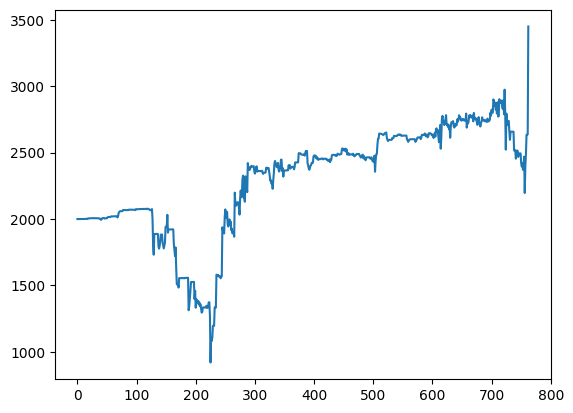

In [44]:
import matplotlib.pyplot as plt

x, y = get_x_y(rec, "total")
plt.plot(y)
plt.show()

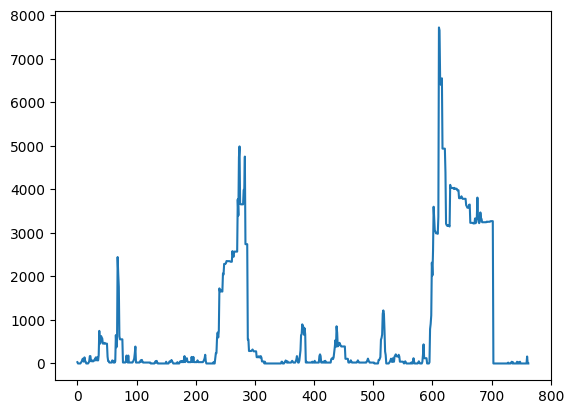

In [33]:
x, y = get_x_y(rec_short, "calc_value")
plt.plot(y)
plt.show()

In [7]:
tx_to_size = {"1m": 10, "15m": 40, "1h": 100}

df["order_size"] = [tx_to_size[k] for k in list(df.tx)]
df["order_size"] = df["order_size"] * abs(df["txi"])

C:\Users\Lukasz\AppData\Local\Temp\ipykernel_20464\3036419841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_size"] = [tx_to_size[k] for k in list(df.tx)]
C:\Users\Lukasz\AppData\Local\Temp\ipykernel_20464\3036419841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_size"] = df["order_size"] * abs(df["txi"])


In [57]:
df

,status,pnl,duration,dd,open,close,entry,exit,ddtms,ddv,created_at,side,tx,txi,opened_at,order_size
6,closed,0.0060,210.0,-0.009882,1659313800000,1659326400000,23365.0,23224.0,1.659319e+12,23453.5,2022-08-01 00:00:00,sell,1m,-3,2022-08-01 00:30:00,30
5,closed,0.0061,94.0,-0.010999,1659335160000,1659340800000,23224.0,23365.0,1.659338e+12,23108.0,2022-08-01 00:00:00,buy,1m,-4,2022-08-01 06:26:00,40
17,closed,0.0061,216.0,-0.012733,1659486240000,1659499200000,22833.0,22972.0,1.659489e+12,22679.5,2022-08-03 00:00:00,buy,1m,-4,2022-08-03 00:24:00,40
18,closed,0.0059,716.0,-0.029732,1659513840000,1659556800000,23109.5,22972.0,1.659529e+12,23655.0,2022-08-03 00:00:00,sell,1m,-2,2022-08-03 08:04:00,20
19,closed,0.0053,665.0,-0.023605,1659516900000,1659556800000,23232.5,23109.5,1.659529e+12,23655.0,2022-08-03 00:00:00,sell,1m,2,2022-08-03 08:55:00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,closed,0.0458,128.0,-0.045086,1669067520000,1669075200000,15460.5,16169.0,1.669068e+12,15440.0,2022-11-15 00:00:00,buy,15m,-4,2022-11-21 21:52:00,160
713,closed,0.0685,1568.0,-0.065375,1669067520000,1669161600000,15460.5,16520.0,1.669068e+12,15440.0,2022-11-13 00:00:00,buy,15m,-4,2022-11-21 21:52:00,160
701,closed,0.1052,11648.0,-0.096416,1669067520000,1669766400000,15460.5,17087.5,1.669068e+12,15440.0,2022-11-11 00:00:00,buy,15m,-4,2022-11-21 21:52:00,160
721,closed,0.0167,2.0,-0.018999,1669849080000,1669849200000,17235.0,16948.0,1.669849e+12,17270.0,2022-11-13 00:00:00,sell,15m,-2,2022-11-30 22:58:00,80


In [49]:
x = 1659940200000

df.pnl[df.open == x].sum()

0.0436

In [69]:
len(xts)

763

In [42]:
res = {}

for t in xts:


[1659313800000,
 1659326400000,
 1659335160000,
 1659340800000,
 1659486240000,
 1659499200000,
 1659513840000,
 1659516900000,
 1659518220000,
 1659524760000,
 1659525060000,
 1659528000000,
 1659528900000,
 1659529680000,
 1659529800000,
 1659556800000,
 1659631620000,
 1659636780000,
 1659657600000,
 1659663720000,
 1659664800000,
 1659666600000,
 1659672000000,
 1659700800000,
 1659831000000,
 1659833100000,
 1659833640000,
 1659837600000,
 1659873660000,
 1659878700000,
 1659880800000,
 1659892380000,
 1659892440000,
 1659895200000,
 1659906180000,
 1659909600000,
 1659937560000,
 1659940200000,
 1659940740000,
 1659947340000,
 1659960300000,
 1659970800000,
 1659988800000,
 1660003200000,
 1660003860000,
 1660004100000,
 1660004460000,
 1660006800000,
 1660011000000,
 1660011300000,
 1660011360000,
 1660032000000,
 1660046400000,
 1660053360000,
 1660089600000,
 1660092000000,
 1660093200000,
 1660118400000,
 1660132800000,
 1660135620000,
 1660135680000,
 1660135980000,
 1660136

In [34]:
df.sort_values("open")

df.to_csv("btc_trades_wave_levels.csv")

In [35]:
df

,status,pnl,duration,dd,open,close,entry,exit,ddtms,ddv,created_at,side,tx,txi,opened_at
0,closed,0.0675,3492.0,-0.083908,1.662486e+12,1662696000000,18867.5,20141.0,1.662517e+12,18451.0,2022-08-01 00:00:00,buy,1h,-4,2022-09-06 17:48:00
1,closed,0.0327,19002.0,-0.112954,1.661556e+12,1662696000000,20141.0,20800.5,1.662517e+12,18451.0,2022-08-01 00:00:00,buy,1h,-3,2022-08-26 23:18:00
2,closed,0.0263,247.0,-0.027778,1.660953e+12,1660968000000,20800.5,21347.5,1.660953e+12,20754.5,2022-08-01 00:00:00,buy,15m,-4,2022-08-19 23:53:00
3,closed,0.0478,34162.0,-0.175135,1.660891e+12,1662940800000,21347.5,22368.5,1.662517e+12,18451.0,2022-08-01 00:00:00,buy,15m,-3,2022-08-19 06:38:00
4,closed,0.0382,587.0,-0.037633,1.659637e+12,1659672000000,22368.5,23224.0,1.659637e+12,22350.0,2022-08-01 00:00:00,buy,15m,-2,2022-08-04 18:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,pending,NaN,NaN,NaN,NaN,1670803200000,18350.0,18191.0,NaN,NaN,2022-11-15 00:00:00,sell,1h,-3,NaT
738,pending,NaN,NaN,NaN,NaN,1670803200000,19554.5,18350.0,NaN,NaN,2022-11-15 00:00:00,sell,1h,2,NaT
739,pending,NaN,NaN,NaN,NaN,1670803200000,19701.0,19554.5,NaN,NaN,2022-11-15 00:00:00,sell,1h,-2,NaT
740,pending,NaN,NaN,NaN,NaN,1670803200000,21009.0,19701.0,NaN,NaN,2022-11-15 00:00:00,sell,1h,3,NaT


In [17]:
import numpy as np
np.mean(_durs)

2964.468120805369

# Risk Management is needed

---

### How to minimize lose trades?

Test ideas:
1. Close after certain time
2. Avoid
3. Close after certain loss
    Check what drawdown winning trades have
    Possible loosing on winning trades

In [4]:
import matplotlib.pyplot as plt

In [5]:
_open = {k: v for k, v in a1.items() if v["status"] == "open"}
_closed = {k: v for k, v in a1.items() if v["status"] == "closed"}

In [15]:
hx_open = [v["open_close"][0] for v in _open.values()]
hx_closed = [v["open_close"][0] for v in _closed.values()]

(array([12.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.66073862e+12, 1.66147735e+12, 1.66221608e+12, 1.66295482e+12,
        1.66369355e+12, 1.66443228e+12, 1.66517101e+12, 1.66590974e+12,
        1.66664848e+12, 1.66738721e+12, 1.66812594e+12]),
 <BarContainer object of 10 artists>)

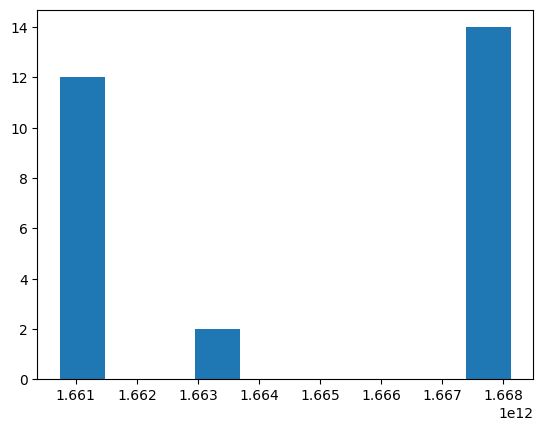

In [7]:
plt.hist(hx_open)

In [9]:
len(_open)

28

In [10]:
_open

{('2022-08-01 00:00:00', 'buy', '15m', -2): {'status': 'open',
  'open_close': (1660891080000, None),
  'entry_exit': (22118.0, 23250.0),
  'pnl': -0.2279,
  'duration': 165202.0},
 ('2022-08-11 00:00:00', 'buy', '15m', -4): {'status': 'open',
  'open_close': (1660872480000, None),
  'entry_exit': (22774.5, 23121.0),
  'pnl': -0.2501,
  'duration': 165512.0},
 ('2022-08-11 00:00:00', 'buy', '15m', -3): {'status': 'open',
  'open_close': (1660864920000, None),
  'entry_exit': (23121.0, 23343.5),
  'pnl': -0.2614,
  'duration': 165638.0},
 ('2022-08-13 00:00:00', 'buy', '15m', -4): {'status': 'open',
  'open_close': (1660872480000, None),
  'entry_exit': (22774.5, 23121.0),
  'pnl': -0.2501,
  'duration': 165512.0},
 ('2022-08-13 00:00:00', 'buy', '15m', -3): {'status': 'open',
  'open_close': (1660864920000, None),
  'entry_exit': (23121.0, 23621.5),
  'pnl': -0.2614,
  'duration': 165638.0},
 ('2022-08-13 00:00:00', 'buy', '15m', -2): {'status': 'open',
  'open_close': (1660738620000, 

In [12]:
tms = 1660891080000

import Backtester.time.time_utility as tim

tim.round_timestamp(tms, "1d")

1660867200000

In [14]:
print(tim.tms_to_str(tms))

print(tim.tms_to_str(tim.round_timestamp(tms, "1d")))

2022-08-19 06:38:00
2022-08-19 00:00:00


In [16]:
import pandas as pd
def round_tms(tms):
    return pd.to_datetime(tim.round_timestamp(tms, "1d"), unit="ms")

hxo = [round_tms(x) for x in hx_open]
hxc = [round_tms(x) for x in hx_closed]

In [17]:
hxo

[Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-18 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-18 00:00:00'),
 Timestamp('2022-08-17 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-17 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-08-19 00:00:00'),
 Timestamp('2022-09-13 00:00:00'),
 Timestamp('2022-09-13 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-07 00:00:00'),
 Timestamp('2022-11-06 00:00:00'),
 Timestamp('2022-11-08 00:00:00'),
 Timestamp('2022-11-07 00:00:00'),
 Timestamp('2022-11-09 00:00:00'),
 Timestamp('2022-11-11 00:00:00')]

(array([12.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([19221. , 19229.6, 19238.2, 19246.8, 19255.4, 19264. , 19272.6,
        19281.2, 19289.8, 19298.4, 19307. ]),
 <BarContainer object of 10 artists>)

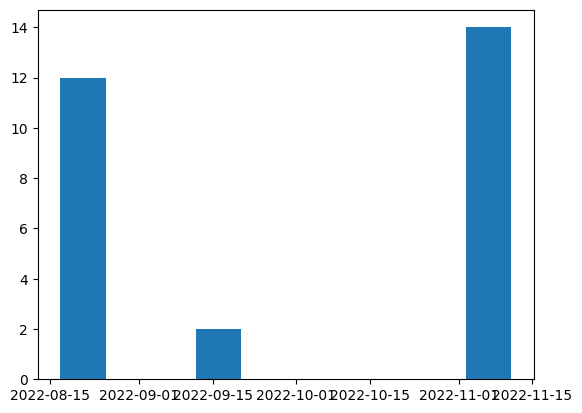

In [18]:
plt.hist(hxo)

(array([57., 65., 33., 85., 39., 68., 74., 79., 77., 19.]),
 array([19205. , 19216.2, 19227.4, 19238.6, 19249.8, 19261. , 19272.2,
        19283.4, 19294.6, 19305.8, 19317. ]),
 <BarContainer object of 10 artists>)

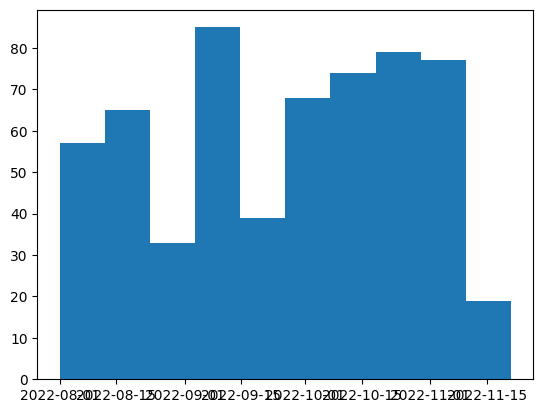

In [19]:
plt.hist(hxc)